In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
de = pd.read_csv('Countries.csv')

In [8]:
de

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,1,Albania,3965,0.987,14.0,0.227,3038594,-3.3
1,2,Algeria,4206,0.800,27.7,0.107,39670000,-0.9
2,3,Andorra,42500,1.000,3.6,0.006,86165,0.0
3,4,Angola,4102,0.711,76.5,0.050,25020000,-0.1
4,5,Anguilla,8800,0.950,3.4,0.029,15000,11.9
...,...,...,...,...,...,...,...,...
165,166,Venezuela,12265,0.963,12.5,0.039,31110000,-1.2
166,167,Vietnam,2111,0.945,17.8,0.170,91700000,-0.3
167,168,Yemen,1408,0.701,47.4,0.147,26830000,0.7
168,169,Zambia,1308,0.634,62.9,0.093,16210000,0.0


In [9]:
de.shape

(170, 8)

In [10]:
de.columns

Index(['Country', 'Name', 'GDPPC', 'Literacy', 'InfantMortality',
       'Agriculture', 'Population', 'NetMigration'],
      dtype='object')

In [11]:
de.isnull().sum()

Country            0
Name               0
GDPPC              0
Literacy           0
InfantMortality    0
Agriculture        0
Population         0
NetMigration       0
dtype: int64

In [12]:
de.describe()

,Country,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
count,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000
mean,85.500000,15227.182353,0.853212,24.342941,0.123194,4.148228e+07,-0.004118
std,49.218899,24233.629202,0.188242,23.264186,0.131084,1.497267e+08,4.626683
min,1.000000,276.000000,0.064000,1.800000,0.000000,1.500000e+04,-14.700000
25%,43.250000,1877.750000,0.783250,6.050000,0.029000,2.525750e+06,-1.775000
50%,85.500000,5778.000000,0.944500,14.400000,0.081000,9.335000e+06,-0.100000
75%,127.750000,15883.500000,0.990000,37.475000,0.170750,2.783750e+07,1.250000
max,170.000000,163352.000000,1.000000,100.000000,0.701000,1.371000e+09,18.200000


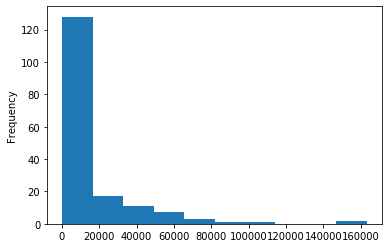

In [13]:
de['GDPPC'].plot.hist()

In [14]:
!wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
 

In [15]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [34]:
de= pd.DataFrame(data = de)


In [69]:
d1 = de.sort_values(['GDPPC','Name'],)

In [70]:
d1

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
25,26,Burundi,276,0.855,60.4,0.412,11180000,0.0
41,42,Democratic Republic of the Congo,300,0.612,69.8,0.442,82240000,-0.2
30,31,Central African Republic,307,0.368,88.4,0.564,4900000,0.0
114,115,Niger,359,0.191,82.8,0.392,19900000,-0.5
94,95,Malawi,381,0.658,44.8,0.290,17220000,0.0
...,...,...,...,...,...,...,...,...
150,151,Switzerland,80215,0.990,3.6,0.008,8287000,4.7
18,19,Bermuda,85748,0.980,2.5,0.006,65235,1.8
92,93,Luxembourg,101450,1.000,3.4,0.003,569676,16.3
90,91,Liechtenstein,149161,1.000,4.3,0.008,37531,5.0


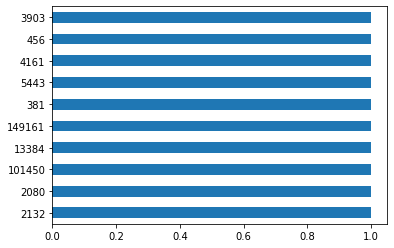

In [71]:
de['GDPPC'].value_counts()[:10].plot(kind='barh')

In [72]:
world_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=de,
    columns=['Name', 'GDPPC'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='GDPPC'
)
 
# display map
world_map

In [46]:
d2 = de.sort_values(['Population','Name'])

In [47]:
d2

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
4,5,Anguilla,8800,0.950,3.4,0.029,15000,11.9
90,91,Liechtenstein,149161,1.000,4.3,0.008,37531,5.0
104,105,Monaco,163352,0.990,1.8,0.000,37731,4.7
29,30,Cayman Islands,64105,0.980,6.0,0.003,59967,14.1
18,19,Bermuda,85748,0.980,2.5,0.006,65235,1.8
...,...,...,...,...,...,...,...,...
22,23,Brazil,8539,0.922,18.0,0.056,207800000,-0.1
71,72,Indonesia,3346,0.939,23.5,0.137,257600000,-1.2
162,163,United States,55837,0.860,5.8,0.011,321400000,3.9
70,71,India,1582,0.712,40.5,0.170,1311000000,0.0


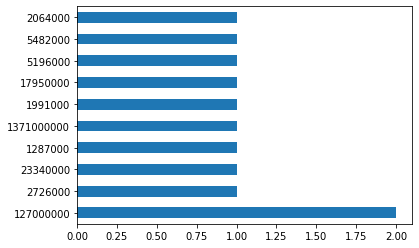

In [65]:
de['Population'].value_counts()[:10].plot(kind='barh')

In [64]:
world_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=de,
    columns=['Name', 'Population'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.9, 
    line_opacity=0.2,
    legend_name='Population'
)
world_map

In [48]:
d3 = de.sort_values(['Literacy', 'Name'])

In [49]:
d3

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
34,35,Colombia,6056,0.064,14.1,0.095,48230000,-0.6
114,115,Niger,359,0.191,82.8,0.392,19900000,-0.5
64,65,Guinea,531,0.304,54.4,0.180,12610000,0.0
30,31,Central African Republic,307,0.368,88.4,0.564,4900000,0.0
24,25,Burkina Faso,613,0.377,73.8,0.344,18110000,0.0
...,...,...,...,...,...,...,...,...
2,3,Andorra,42500,1.000,3.6,0.006,86165,0.0
54,55,Finland,41921,1.000,2.5,0.028,5482000,3.0
90,91,Liechtenstein,149161,1.000,4.3,0.008,37531,5.0
92,93,Luxembourg,101450,1.000,3.4,0.003,569676,16.3


In [61]:
de['Literacy'].value_counts()[:5].plot(kind='barh')

KeyError: 5.0

In [28]:
world_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=de,
    columns=['Name', 'Literacy'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Literacy'
)
world_map

In [50]:
d4 = de.sort_values(['NetMigration', 'Name'])
d4

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
50,51,Eritrea,544,0.678,45.6,0.172,4790000,-14.7
79,80,Jordan,4940,0.954,14.7,0.036,7595000,-13.4
96,97,Maldives,7681,0.993,22.9,0.035,406163,-12.7
82,83,Kosovo,2300,0.919,11.4,0.129,1803000,-12.0
103,104,Moldova,1843,0.994,12.3,0.161,3554000,-9.5
...,...,...,...,...,...,...,...,...
11,12,Bahrain,23396,0.957,9.2,0.003,1377000,12.6
138,139,Singapore,52889,0.968,2.4,0.000,5535000,13.6
29,30,Cayman Islands,64105,0.980,6.0,0.003,59967,14.1
92,93,Luxembourg,101450,1.000,3.4,0.003,569676,16.3


In [66]:
de['NetMigration'].value_counts()[:10].plot(kind='barh')

KeyError: 10.0

In [29]:
world_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=de,
    columns=['Name', 'NetMigration'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='NetMigration'
)
world_map

In [52]:
d5 = de.sort_values(['Agriculture','Name'])
d5

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
104,105,Monaco,163352,0.990,1.8,0.000,37731,4.7
138,139,Singapore,52889,0.968,2.4,0.000,5535000,13.6
127,128,Qatar,74667,0.973,6.2,0.001,2235000,18.2
11,12,Bahrain,23396,0.957,9.2,0.003,1377000,12.6
29,30,Cayman Islands,64105,0.980,6.0,0.003,59967,14.1
...,...,...,...,...,...,...,...,...
155,156,Togo,548,0.665,43.7,0.467,7305000,0.0
137,138,Sierra Leone,693,0.481,70.0,0.515,6453000,-2.4
30,31,Central African Republic,307,0.368,88.4,0.564,4900000,0.0
142,143,Somalia,552,0.378,96.6,0.602,10790000,-7.5


In [67]:
de['Agriculture'].value_counts()[:10].plot(kind='barh')

KeyError: 10.0

In [31]:
world_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=de,
    columns=['Name', 'Agriculture'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Agriculture'
)
world_map

In [54]:
d6 = de.sort_values(['InfantMortality', 'Name'])
d6

,Country,Name,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
104,105,Monaco,163352,0.990,1.8,0.000,37731,4.7
78,79,Japan,32477,0.990,2.0,0.012,127000000,0.0
69,70,Iceland,50173,0.990,2.1,0.060,330823,4.2
138,139,Singapore,52889,0.968,2.4,0.000,5535000,13.6
18,19,Bermuda,85748,0.980,2.5,0.006,65235,1.8
...,...,...,...,...,...,...,...,...
114,115,Niger,359,0.191,82.8,0.392,19900000,-0.5
31,32,Chad,776,0.402,87.0,0.244,14040000,-3.3
30,31,Central African Republic,307,0.368,88.4,0.564,4900000,0.0
142,143,Somalia,552,0.378,96.6,0.602,10790000,-7.5


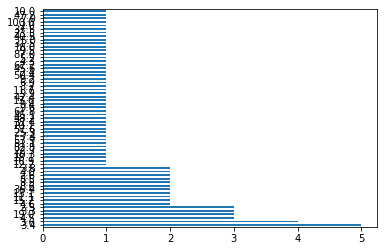

In [68]:
de['InfantMortality'].value_counts()[:10].plot(kind='barh')

In [32]:
world_geo = r'world_countries.json' # geojson file
 
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=de,
    columns=['Name', 'InfantMortality'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='InfantMortality'
)
world_map